In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.stats import multivariate_normal
import math
import time
import multiprocessing as mp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
from matplotlib import rc


# MUTANTS

- Recreates the spatial patterning of wiltype and mutants presented by Cohen et al (2014) after including protein dynamics in the model
- Set alpha=0 and initial condition =0 for mutants

In [6]:

def simulate_data(parameter_list):
    run= solve_ivp(ODEs, y0=X0, t_span = t_range, args =tuple(parameter_list), t_eval = timepts, dense_output=True) 
#     run_array = np.array(run.y[0:4]).T    
    run_array = np.array(run.y).T

    return run_array

G: [1.         0.51341712 0.26359714 0.13533528 0.06948345 0.03567399
 0.01831564 0.00940356 0.00482795 0.00247875 0.00127263]


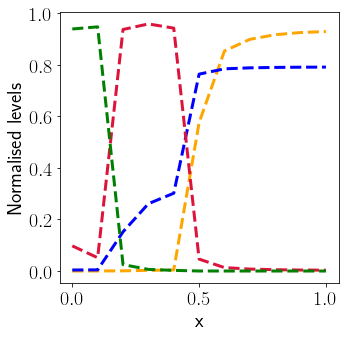

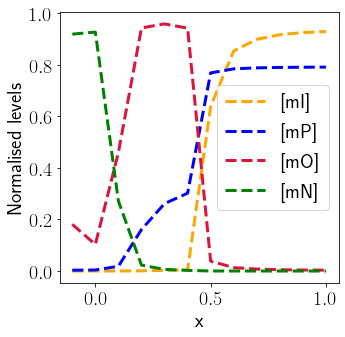

In [7]:
def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):

    ## Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])


## I P O N
# X0 = [0.9,0.95,0.11,0.002]
X0 = [1,1,0,0,1,1,0,0]
timepts=[0.5,1, 1.5, 2, 2.5, 3, 3.5, 4,5,6,7,8,9,10,11,12,13,14,16,18,20]
t_range=[0.5,20]
alpha_s=100
x = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Gs = np.exp(-x/0.15)
L=0.8
c=10
print('G:',Gs)

peaks = [0.14664250751765692, 0.07751490598582489, 1.0750962183112382, 0.6414799643867624, 0.5371194132338379, 1.8879630372610876, -0.7714850961134183, 1.8902545068786845, 0.8761092355888365, 0.5745155547245453, 0.6308442953609621, -0.8364602541110746, 0.10871700343449842, -0.6171452052053545, -0.9340166901946141, 0.07587541639252882, 1.030788024298784]

unloggedpeaks = np.array([2.1,2.1,76.2,58.8,26.7,1.9,28.4,60.6,18.0,47.1,4.8,27.1, 37.3,27.4, 4.80, 23.4, 47.8])
peaks = np.log10(unloggedpeaks)
# print(peaks)
rc('text', usetex=True)

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))

#     _, ax = plt.subplots()
#     ax.plot(timepts, go[:, 0], "--", color="orange")
#     ax.plot(timepts, go[:, 1], "--", color="blue")
#     ax.plot(timepts, go[:, 2], "--", color="crimson")
#     ax.plot(timepts, go[:, 3], "--", color="green")
#     ax.plot(timepts, go[:, 4], "-", color="orange")
#     ax.plot(timepts, go[:, 5], "-", color="blue")
#     ax.plot(timepts, go[:, 6], "-", color="crimson")
#     ax.plot(timepts, go[:, 7], "-", color="green")
#     ax.set_xlabel("time steps")
#     ax.set_ylabel("concentration")
#     ax.set_title(" varying K parameters")
#     ax.legend(loc ='upper right');
#     plt.show()

ss=np.array(ss)

### plot ###
plt.rcParams.update({'font.size': 20})


## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "--", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "--", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "--", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "--", color="green", label = "[mN]",linewidth=3.0)

ax.set_xlabel("x")
ax.set_ylabel("Normalised levels")
# ax.set_title('Wild type,' + r'$\_S$'+'=2.1'+ r'$\gamma_S$'+'=2.1')
plt.savefig('mutants/Rayon_mutants/WT')
plt.show()

### hooman - halve protein production and degradation rate

peaks = [0.14664250751765692, 0.07751490598582489, 1.0750962183112382, 0.6414799643867624, 0.5371194132338379, 1.8879630372610876, -0.7714850961134183, 1.8902545068786845, 0.8761092355888365, 0.5745155547245453, 0.6308442953609621, -0.8364602541110746, 0.10871700343449842, -0.6171452052053545, -0.9340166901946141, 0.07587541639252882, 1.030788024298784]

unloggedpeaks = np.array([1.05,1.05,76.2,58.8,26.7,1.9,28.4,60.6,18.0,47.1,4.8,27.1, 37.3,27.4, 4.80, 23.4, 47.8])
peaks = np.log10(unloggedpeaks)

x = np.array([-0.1,0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Gs = np.exp(-x/0.15)
ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))

ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "--", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "--", color="blue", label = "[mP]", linewidth=3.0)
ax.plot(x, ss[:, 2], "--", color="crimson", label = "[mO]", linewidth=3.0)
ax.plot(x, ss[:, 3], "--", color="green", label = "[mN]", linewidth=3.0)
ax.set_xlabel("x")
ax.set_ylabel("Normalised levels")
# ax.set_title('Wild type,' + r'$\_S$'+'=1.05' + r'$\gamma_S$'+ '=1.05')
ax.legend(loc ='center right');
# plt.savefig('mutants/Rayon_mutants/WThooman')
plt.show()


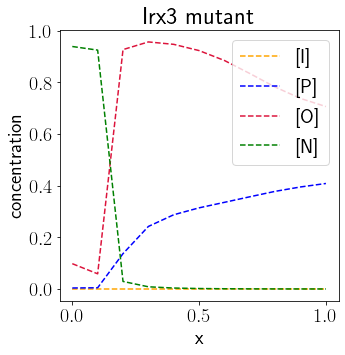

In [9]:
# I  mutant
X0 = [0,1,0,0,0,1,0,0]
x = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Gs = np.exp(-x/0.15)
def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):
    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = 0*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))

ss=np.array(ss)

### plot ###
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "--", color="orange", label="[I]")
ax.plot(x, ss[:, 1], "--", color="blue", label = "[P]")
ax.plot(x, ss[:, 2], "--", color="crimson", label = "[O]")
ax.plot(x, ss[:, 3], "--", color="green", label = "[N]")
ax.set_xlabel("x")
ax.set_ylabel("concentration")
ax.set_title("Irx3 mutant")
ax.legend(loc ='upper right');
# plt.savefig('mutants/Rayon_mutants/I--.png')
plt.show()

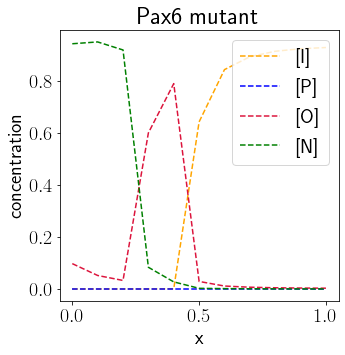

In [10]:
# P  mutant
X0 = [1,0,0,0,1,0,0,0]
def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):
    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = 0*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))

ss=np.array(ss)

### plot ###
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "--", color="orange", label="[I]")
ax.plot(x, ss[:, 1], "--", color="blue", label = "[P]")
ax.plot(x, ss[:, 2], "--", color="crimson", label = "[O]")
ax.plot(x, ss[:, 3], "--", color="green", label = "[N]")
ax.set_xlabel("x")
ax.set_ylabel("concentration")
ax.set_title("Pax6 mutant")
ax.legend(loc ='upper right');
# plt.savefig('mutants/Rayon_mutants/P--.png')
plt.show()


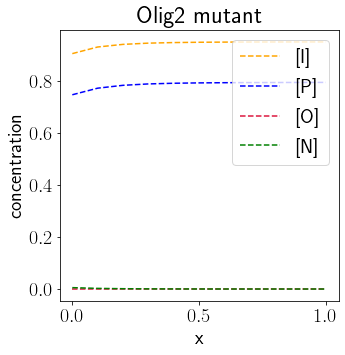

In [11]:
# O mutant

X0 = [1,1,0,0,1,1,0,0]
def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):
    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = 0*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))

ss=np.array(ss)

### plot ###
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "--", color="orange", label="[I]")
ax.plot(x, ss[:, 1], "--", color="blue", label = "[P]")
ax.plot(x, ss[:, 2], "--", color="crimson", label = "[O]")
ax.plot(x, ss[:, 3], "--", color="green", label = "[N]")
ax.set_xlabel("x")
ax.set_ylabel("concentration")
ax.set_title("Olig2 mutant")
ax.legend(loc ='upper right');
# plt.savefig('mutants/Rayon_mutants/O--.png')
plt.show()

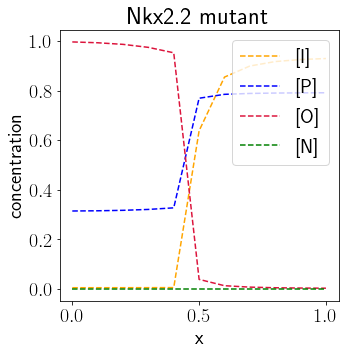

In [12]:
# N mutant

X0 = [1,1,0,0,1,1,0,0]
def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):
    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = 0*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))

ss=np.array(ss)

### plot ###
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "--", color="orange", label="[I]")
ax.plot(x, ss[:, 1], "--", color="blue", label = "[P]")
ax.plot(x, ss[:, 2], "--", color="crimson", label = "[O]")
ax.plot(x, ss[:, 3], "--", color="green", label = "[N]")
ax.set_xlabel("x")
ax.set_ylabel("concentration")
ax.set_title("Nkx2.2 mutant")
ax.legend(loc ='upper right');
# plt.savefig('mutants/Rayon_mutants/N--.png')
plt.show()

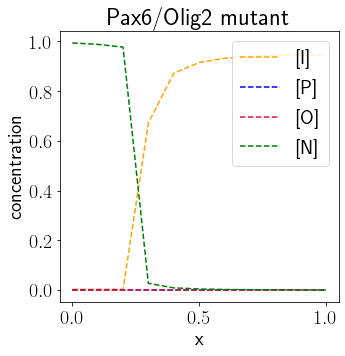

In [13]:
# P/O mutant

X0 = [1,0,0,0,1,0,0,0]
def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):
    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = 0*phi_P - alpha_s*X[1]
    dmO_dt = 0*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))

ss=np.array(ss)

### plot ###
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "--", color="orange", label="[I]")
ax.plot(x, ss[:, 1], "--", color="blue", label = "[P]")
ax.plot(x, ss[:, 2], "--", color="crimson", label = "[O]")
ax.plot(x, ss[:, 3], "--", color="green", label = "[N]")
ax.set_xlabel("x")
ax.set_ylabel("concentration")
ax.set_title("Pax6/Olig2 mutant")
ax.legend(loc ='upper right');
# plt.savefig('mutants/Rayon_mutants/P--O--.png')
plt.show()

[0.32221929 0.32221929 1.88195497 1.76937733 1.42651126 0.2787536
 1.45331834 1.78247262 1.25527251 1.67302091 0.68124124 1.43296929
 1.57170883 1.43775056 0.68124124 1.36921586 1.6794279 ]


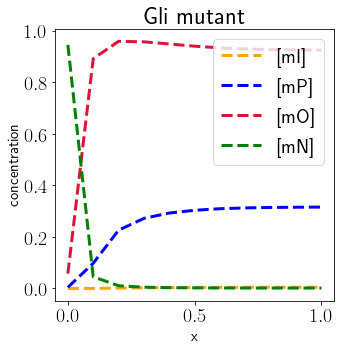

In [19]:
# Gli mutant
x = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Gs = np.exp(-x/0.15)

unloggedpeaks = np.array([2.1,2.1,76.2,58.8,26.7,1.9,28.4,60.6,18.0,47.1,4.8,27.1, 37.3,27.4, 4.80, 23.4, 47.8])
peaks = np.log10(unloggedpeaks)
print(peaks)

X0 = [1,1,0,0,1,1,0,0]
def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):
    K_GN=0
    K_GO=0
    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))

ss=np.array(ss)

### plot ###
# plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()

ax.plot(x, ss[:, 0], "--", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "--", color="blue", label = "[mP]", linewidth=3.0)
ax.plot(x, ss[:, 2], "--", color="crimson", label = "[mO]", linewidth=3.0)
ax.plot(x, ss[:, 3], "--", color="green", label = "[mN]", linewidth=3.0)
ax.set_xlabel("x",  fontsize=15)
ax.set_ylabel("concentration", fontsize=15)
ax.set_title("Gli mutant")
ax.legend(loc ='upper right');
# plt.savefig('mutants/Rayon_mutants/G--hooman2.png')
plt.show()